In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy import stats

In [2]:
# wirtten main directory  
writeMainScarch = '/mnt/scratch/projects/7TPD/amin'
# name of model
model_name = 'tabel3_model1'
# The adrees name of pickle file
pickelDir_HC = f'{writeMainScarch}/Behavioral/Tabel3/HC/{model_name}_HC.pkl'
# pickle file in the scratch folder in PD
pickelDir_PD = f'{writeMainScarch}/Behavioral/Tabel3/PD/{model_name}_PD.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl_HC = utils.load_pickle(load_path=pickelDir_HC)
loadPkl_PD = utils.load_pickle(load_path=pickelDir_PD)
fit_HC = loadPkl_HC['fit']
fit_PD = loadPkl_PD['fit']

In [ ]:

# Extracting posterior distributions for each of four main unkhown parameters in HC
transfer_hier_alphaAct_pos_mu_HC = fit_HC["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_HC = fit_HC["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_HC = fit_HC["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_HC = fit_HC["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_HC = fit_HC["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_HC = fit_HC["transfer_hier_sensitivity_mu"]

# Extracting posterior distributions for each of four main unkhown parameters in PD
transfer_hier_alphaAct_pos_mu_PD = fit_PD["transfer_hier_alphaAct_pos_mu"] 
transfer_hier_alphaAct_neg_mu_PD = fit_PD["transfer_hier_alphaAct_neg_mu"] 
transfer_hier_alphaClr_pos_mu_PD = fit_PD["transfer_hier_alphaClr_pos_mu"] 
transfer_hier_alphaClr_neg_mu_PD = fit_PD["transfer_hier_alphaClr_neg_mu"] 
transfer_hier_weight_mu_PD = fit_PD["transfer_hier_weight_mu"] 
transfer_hier_sensitivity_mu_PD = fit_PD["transfer_hier_sensitivity_mu"]


: 

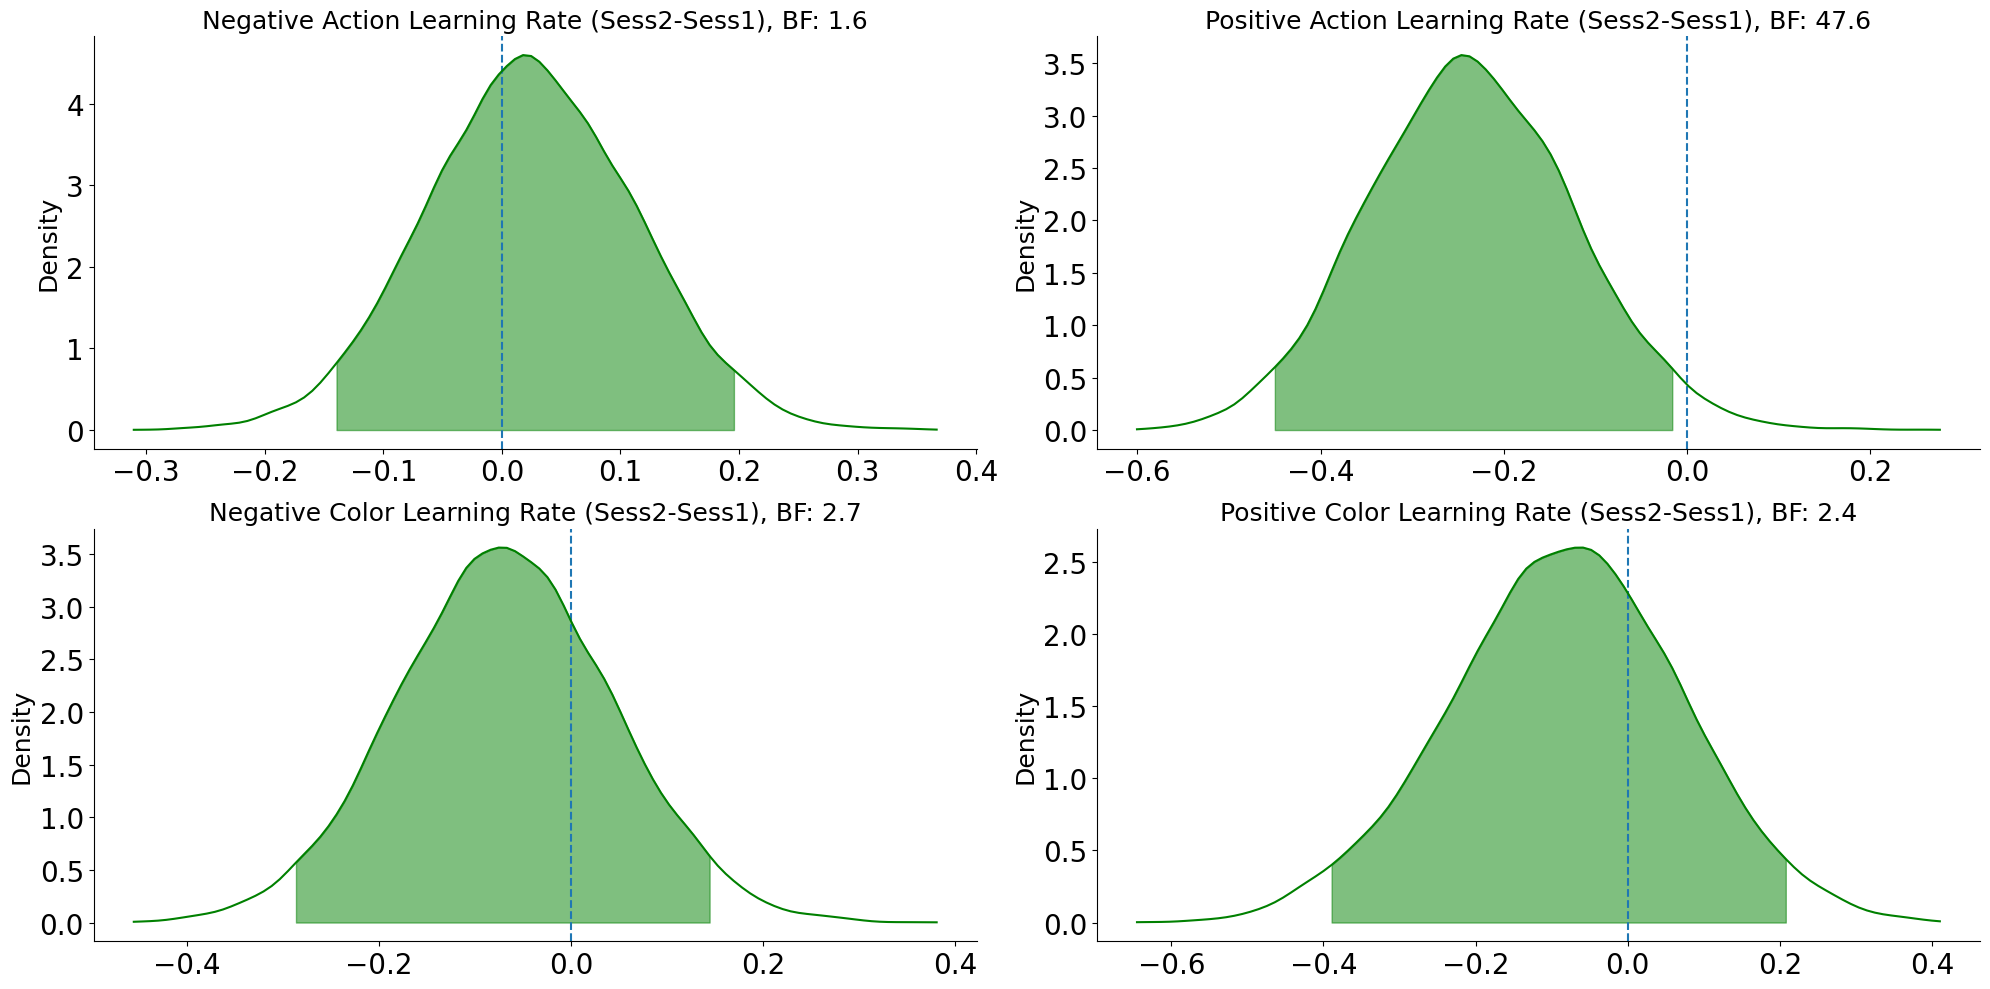

In [21]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Action Learning Rate
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=alphaAct_neg[1,0] - alphaAct_neg[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaAct_neg[1,0] - alphaAct_neg[0,0])>0)
bf = i/(1-i)
plt.title(f'Negative Action Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Action Learning Rate
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=alphaAct_pos[1,0] - alphaAct_pos[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaAct_pos[1,0] - alphaAct_pos[0,0])>0)
bf = (1-i)/i
plt.title(f'Positive Action Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Color Learning Rate
fig.add_subplot(rows, columns, 3)
plots.plot_posterior(x=alphaClr_neg[1,1] - alphaClr_neg[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaClr_neg[1,1] - alphaClr_neg[0,1])>0)
bf = (1-i)/i
plt.title(f'Negative Color Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Color Learning Rate
fig.add_subplot(rows, columns, 4)
plots.plot_posterior(x=alphaClr_pos[1,1] - alphaClr_pos[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaClr_pos[1,1] - alphaClr_pos[0,1])>0)
bf = (1-i)/i
plt.title(f'Positive Color Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
fig.savefig(f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1_differ1.png', dpi=500)


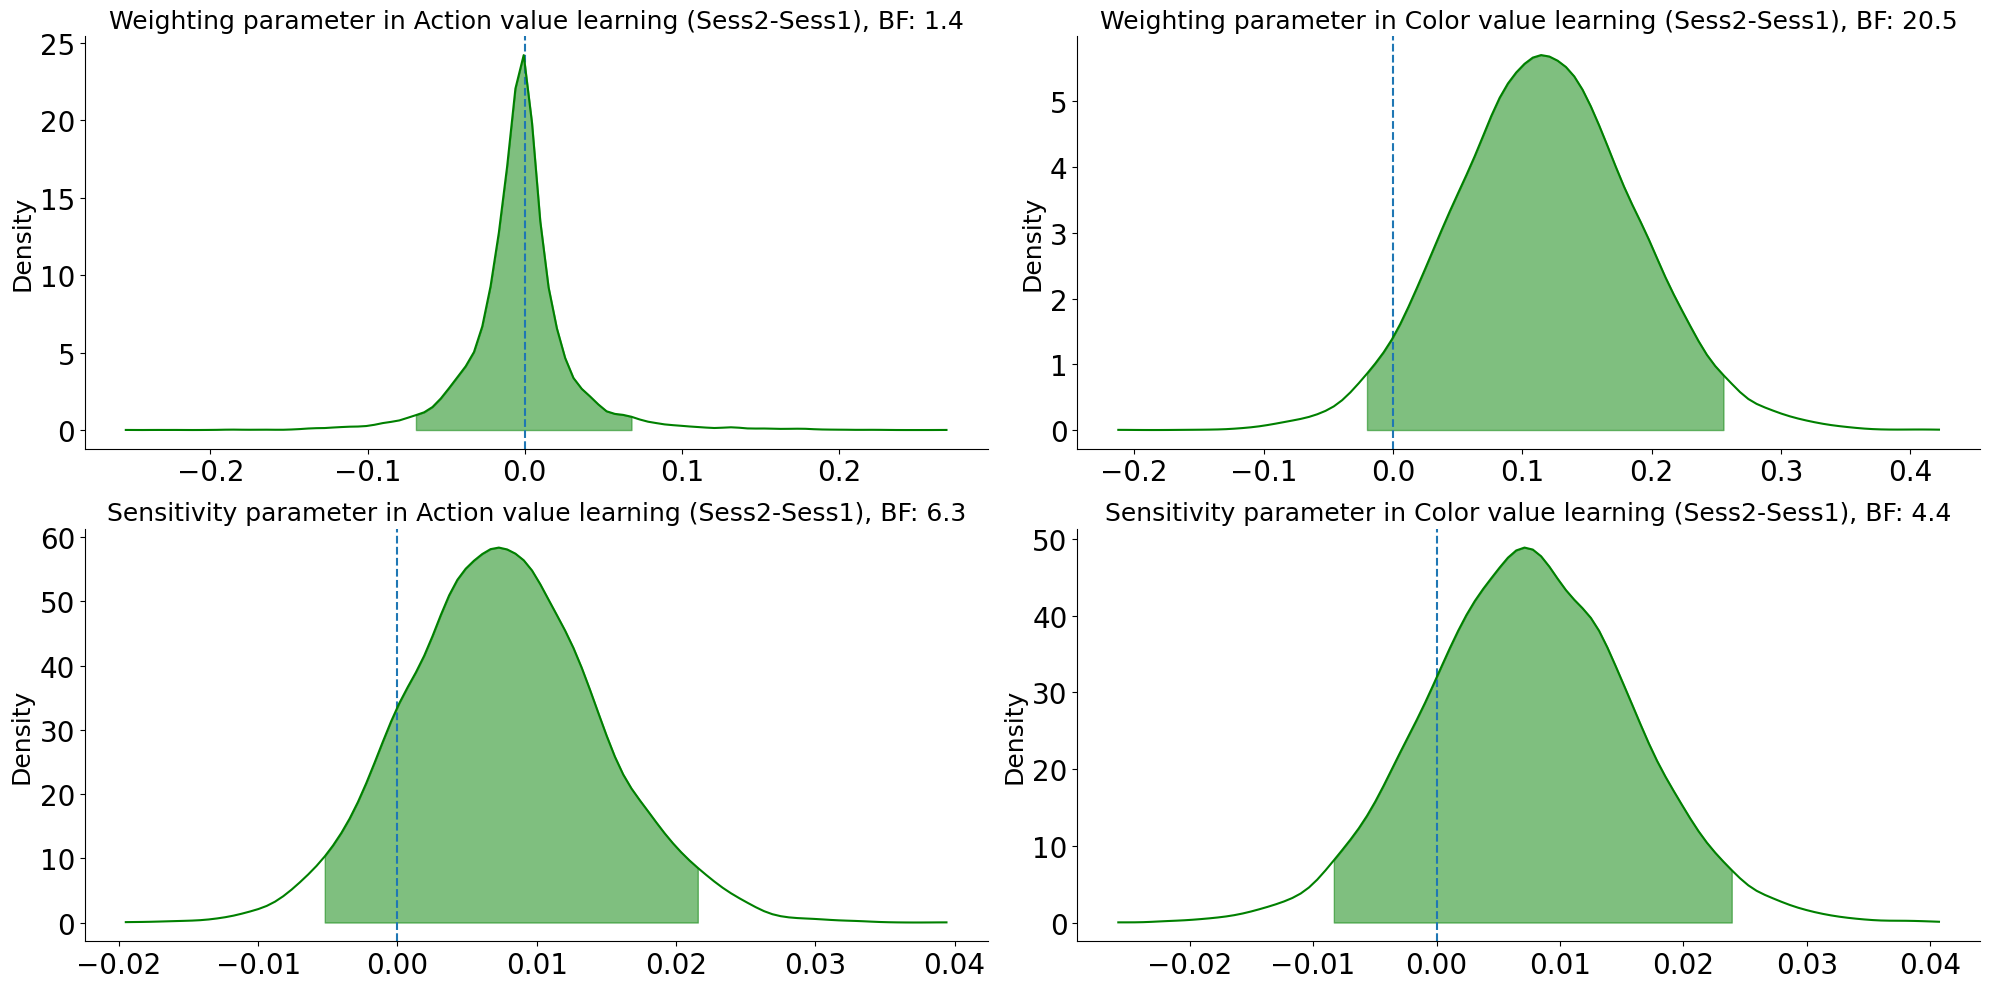

In [22]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Weightign parameter
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=weight[1,0] - weight[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight[1,0] - weight[0,0])>0)
bf = (1-i)/i
plt.title(f'Weighting parameter in Action value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weighting parameter
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=weight[1,1] - weight[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight[1,1]- weight[0,1])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter in Color value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weightign parameter
fig.add_subplot(rows, columns, 3)
plots.plot_posterior(x=beta[1,0] - beta[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((beta[1,0] - beta[0,0])>0)
bf = i/(1-i)
plt.title(f'Sensitivity parameter in Action value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weighting parameter
fig.add_subplot(rows, columns, 4)
plots.plot_posterior(x=beta[1,1] - beta[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((beta[1,1]- beta[0,1])>0)
bf = i/(1-i)
plt.title(f'Sensitivity parameter in Color value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

fig.savefig(f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1_differ2.png', dpi=500)


In [29]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit']

In [ ]:
transfer_theta_PD = fit_PD['transfer_weight']
transfer_weight_PD = fit_PD["transfer_hier_weight_mu"] 


In [52]:
transfer_theta_PD.shape

(23, 2, 2, 9000)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

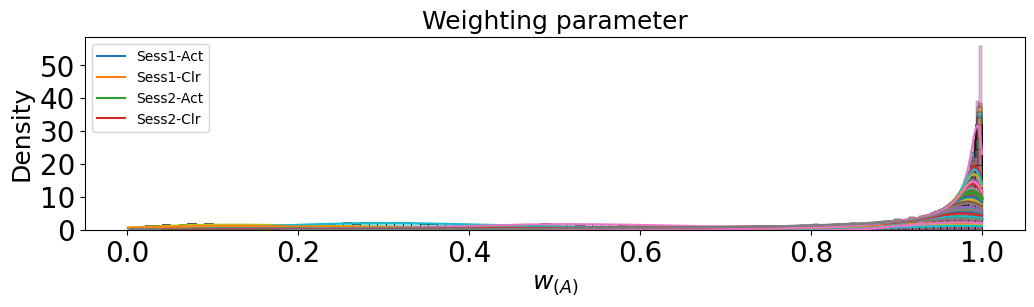

In [6]:
fig = plt.figure(figsize=(20, 8), tight_layout=True)
rows = 3
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
for i in range(24):
    sns.histplot(transfer_theta_PD[i, 0,0], kde=True, stat='density', bins=100)
    sns.histplot(transfer_theta_PD[i, 1,0], kde=True, stat='density', bins=100)   
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

<Axes: ylabel='Density'>

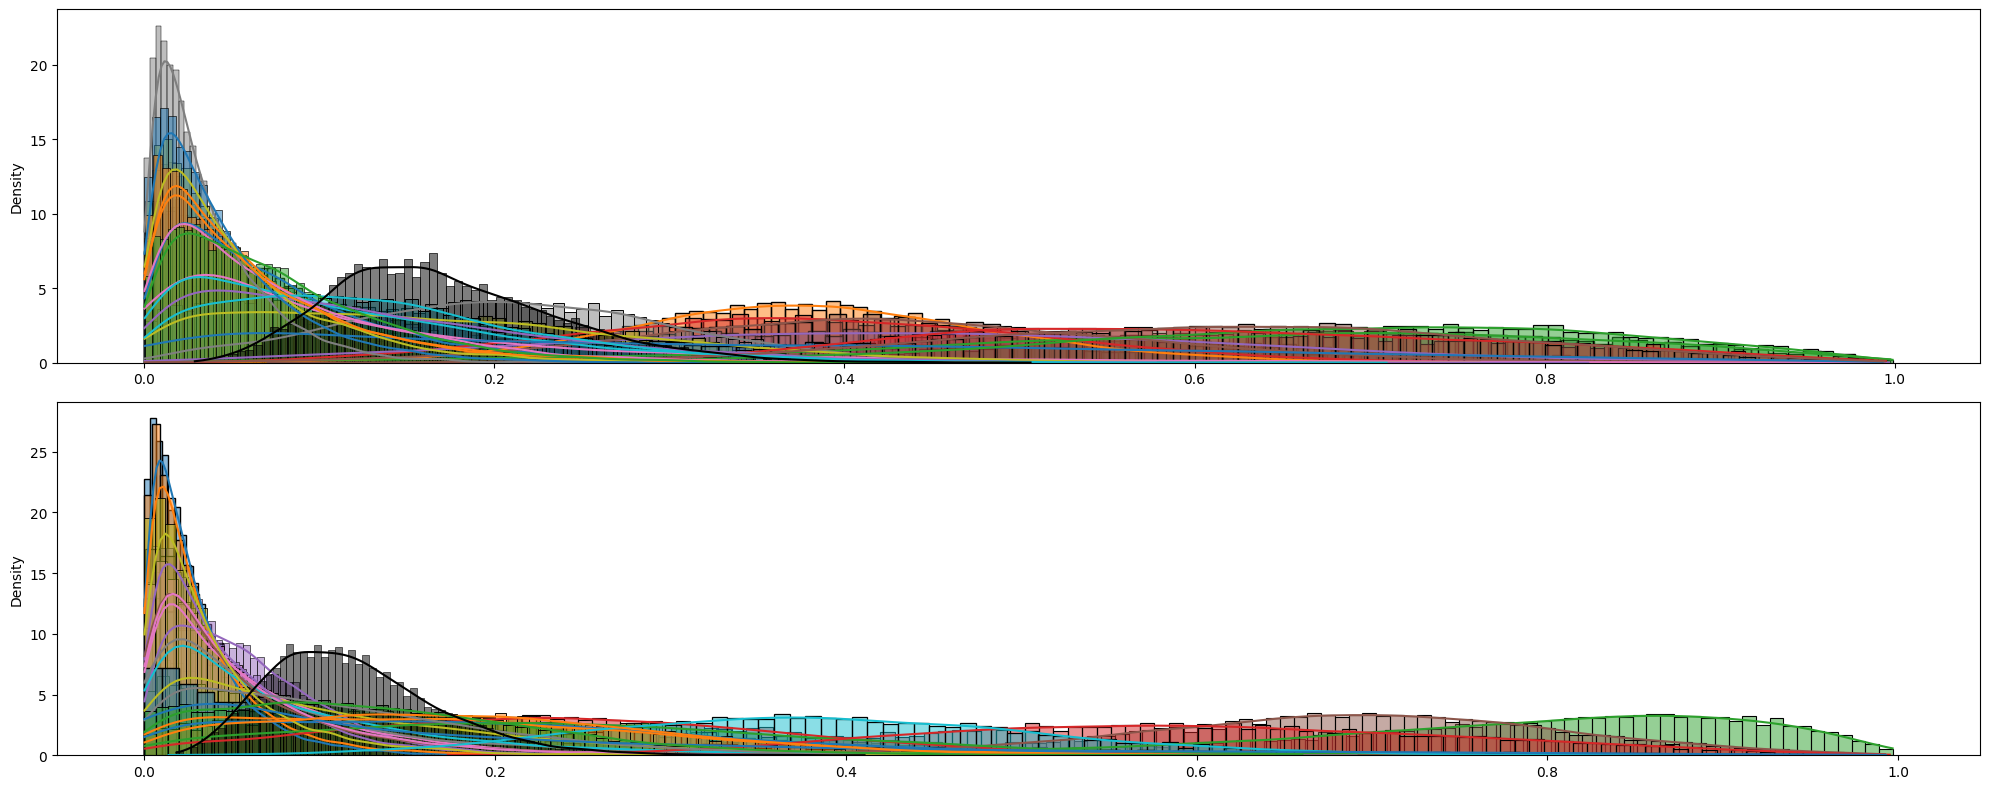

In [53]:
fig = plt.figure(figsize=(20, 8), tight_layout=True)
rows = 2
columns = 1

# Weghtening
fig.add_subplot(rows, columns, 1)
for i in range(23):
    sns.histplot(transfer_theta_PD[i, 1,1], kde=True, stat='density', bins=100)

sns.histplot(transfer_weight_PD[1,1], kde=True, stat='density', bins=100, color='black')

# Weghtening
fig.add_subplot(rows, columns, 2)
for i in range(23):
    sns.histplot(transfer_theta_PD[i, 0,1], kde=True, stat='density', bins=100)
sns.histplot(transfer_weight_PD[0,1], kde=True, stat='density', bins=100, color='black')


array([0.0036211])

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

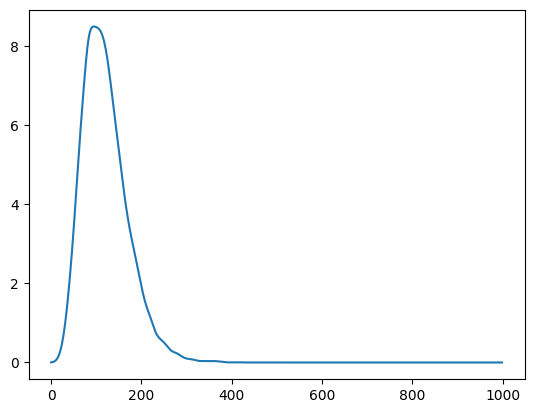

In [83]:
np.arange(0,1,.001).shape

(1000,)

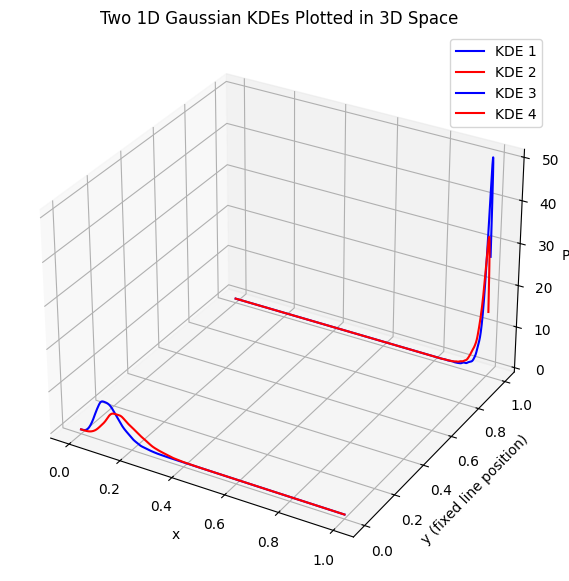

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example datasets
np.random.seed(0)
data1 = transfer_weight_PD[0,0]
data2 = transfer_weight_PD[1,0]

data3 = transfer_weight_PD[0,1]
data4 = transfer_weight_PD[1,1]

# KDEs
kde1 = stats.gaussian_kde(data1)
kde2 = stats.gaussian_kde(data2)
kde3 = stats.gaussian_kde(data3)
kde4 = stats.gaussian_kde(data4)

# Grid for x values
x = np.linspace(0, 1, 5000)
z1 = kde1(x)
z2 = kde2(x)
z3 = kde3(x)
z4 = kde4(x)

# Set static y-values for each curve
y1 = np.full_like(x,1)
y2 = np.full_like(x,1)
y3 = np.full_like(x,0)
y4 = np.full_like(x,0)

# Create 3D plot
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each KDE as a 3D line (like a ridge)
ax.plot(x, y1, z1, label='KDE 1', color='blue')
ax.plot(x, y2, z2, label='KDE 2', color='red')
ax.plot(x, y3, z3, label='KDE 3', color='blue')
ax.plot(x, y4, z4, label='KDE 4', color='red')

# Labeling
ax.set_xlabel('x')
ax.set_ylabel('y (fixed line position)')
ax.set_zlabel('PDF')
ax.set_title('Two 1D Gaussian KDEs Plotted in 3D Space')
ax.legend()

# Set the view
#ax.view_init(elev=10, azim=-80)

plt.show()


In [136]:
for i in range(len(transfer_theta_PD)):
    if transfer_theta_PD[i, 0,1].mean()>.66:
        print(i)

2
5


<Axes: ylabel='Density'>

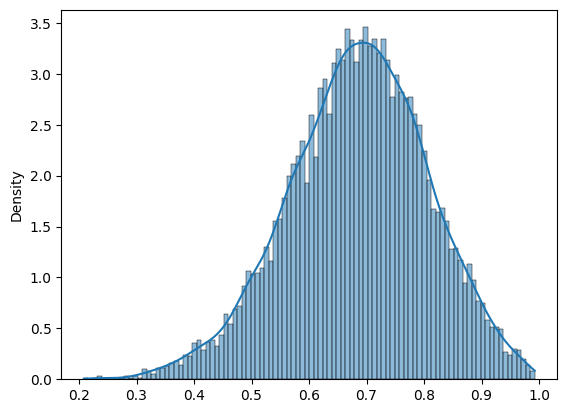

In [69]:
sns.histplot(transfer_theta_PD[5, 0,1], kde=True, stat='density', bins=100)


In [26]:
df = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/AllBehData/NoNanOutlierBehAll1.csv')
df[df['patient']=='PD']['sub_ID'].unique()[9]

'sub-056'

In [70]:
df[df['patient']=='HC']['sub_ID'].unique()[5]

'sub-036'

In [34]:
for i in range(len(transfer_theta_PD)):
    if transfer_theta_PD[i, 1,1].mean()>.7:
        print(i)

21


In [ ]:
sns.histplot(transfer_theta_PD[i, 1,1], kde=True, stat='density', bins=100)


In [22]:
summary = az.summary(fit)

/mrhome/amingk/anaconda3/envs/7tpd/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/mrhome/amingk/anaconda3/envs/7tpd/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/mrhome/amingk/anaconda3/envs/7tpd/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/mrhome/amingk/anaconda3/envs/7tpd/lib/python3.9/site-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/mrhome/amingk/anaconda3/envs/7tpd/lib/pytho

In [26]:
summary['r_hat'].min()

1.0

In [9]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos = fit["transfer_hier_alphaAct_pos_mu1"] 
alphaAct_neg = fit["transfer_hier_alphaAct_neg_mu1"] 
alphaClr_pos = fit["transfer_hier_alphaClr_pos_mu1"] 
alphaClr_neg = fit["transfer_hier_alphaClr_neg_mu1"] 
weight = fit["transfer_hier_weight_mu1"] 
beta = fit["transfer_hier_sensitivity_mu1"]

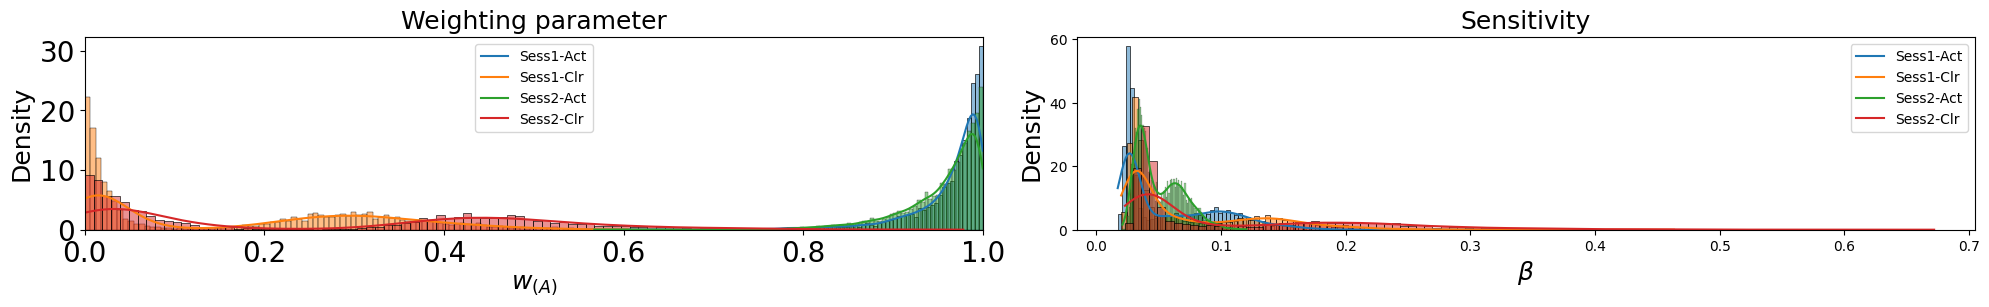

In [10]:
fig = plt.figure(figsize=(20, 8), tight_layout=True)
rows = 3
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(weight[0,0], kde=True, stat='density', bins=100)
sns.histplot(weight[0,1], kde=True, stat='density', bins=100)
sns.histplot(weight[1,0], kde=True, stat='density', bins=100)
sns.histplot(weight[1,1], kde=True, stat='density', bins=100)
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.xlim(0, 1)
# Sensitivity
fig.add_subplot(rows, columns, 2)
sns.histplot(beta[0,0], kde=True, stat='density', bins=100)
sns.histplot(beta[0,1], kde=True, stat='density', bins=100)
sns.histplot(beta[1,0], kde=True, stat='density', bins=100)
sns.histplot(beta[1,1], kde=True, stat='density', bins=100)
plt.title('Sensitivity',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel(r'$\beta$',  fontsize=18)
plt.legend(['Sess1-Act', 'Sess1-Clr', 'Sess2-Act', 'Sess2-Clr']) 


In [ ]:
from scipy import stats

x = np.random.normal(1,1, 10000)
y = stats.norm.cdf(x)

<Axes: ylabel='Density'>

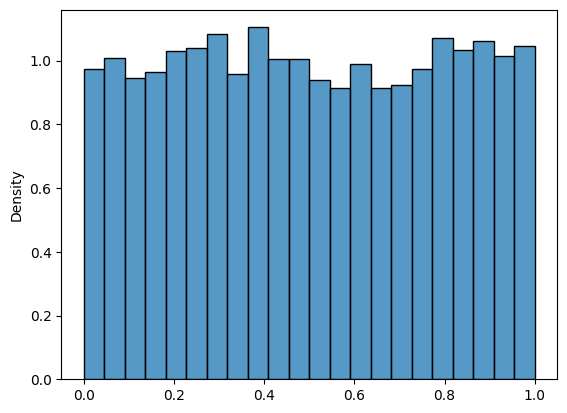

In [57]:
import seaborn
sns.histplot(y, stat='density')

In [7]:
stats.norm.cdf(-1)

0.15865525393145707

In [5]:
# the winning model
model = 'HierRL_Mixture_notdual_dual_diffLR4'
# # main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'

# pickle file for HC
pickelDir = f'{mainScarch}/realdata/HC/{model}.pkl'
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 

In [6]:
summary_HC = az.summary(fit)

In [9]:
summary_PD

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"hier_alphaAct_pos_mu1[0, 0]",1.283,0.733,-0.128,2.716,0.100,0.071,58.0,90.0,1.08
"hier_alphaAct_pos_mu1[0, 1]",-0.650,0.930,-2.349,1.133,0.098,0.070,97.0,310.0,1.05
"hier_alphaAct_pos_mu1[1, 0]",1.353,0.750,-0.105,2.781,0.108,0.077,51.0,96.0,1.10
"hier_alphaAct_pos_mu1[1, 1]",0.151,0.888,-1.509,1.808,0.010,0.007,8589.0,8840.0,1.00
"hier_alphaAct_neg_mu1[0, 0]",-0.582,0.646,-1.991,0.439,0.145,0.104,25.0,74.0,1.22
...,...,...,...,...,...,...,...,...,...
transfer_theta[18],0.825,0.298,0.243,1.000,0.090,0.067,19.0,86.0,1.33
transfer_theta[19],0.827,0.309,0.074,1.000,0.084,0.063,20.0,64.0,1.30
transfer_theta[20],0.989,0.029,0.955,1.000,0.002,0.002,239.0,200.0,1.02
transfer_theta[21],0.764,0.407,0.000,1.000,0.121,0.088,20.0,69.0,1.31


In [11]:
summary[0:20]

NameError: name 'summary' is not defined

In [49]:

# Extracting posterior distributions for each of four main unkhown parameters in HC
alphaAct_pos_mu_HC1 = fit["hier_alphaAct_pos_mu1"] 
alphaAct_neg_mu_HC1 = fit["hier_alphaAct_neg_mu1"] 
alphaClr_pos_mu_HC1 = fit["hier_alphaClr_pos_mu1"] 
alphaClr_neg_mu_HC1 = fit["hier_alphaClr_neg_mu1"]
hier_weight_mu = fit["transfer_hier_weight_mu"]
hier_theta_mu = fit["hier_theta_mu"]
transfer_theta = fit["transfer_theta"]

In [ ]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 12), tight_layout=True)
rows = 3
columns = 4

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(hier_weight_mu[0,0], kde=True, stat='density', bins=100)
sns.histplot(hier_weight_mu[0,1], kde=True, stat='density', bins=100)
sns.histplot(hier_weight_mu[1,0], kde=True, stat='density', bins=100)
sns.histplot(hier_weight_mu[1,1], kde=True, stat='density', bins=100)
plt.title('Weighting parameter',  fontsize=18)
plt.ylabel('Density',  fontsize=18)
plt.xlabel('$w_{(A)}$',  fontsize=18)


<Axes: ylabel='Density'>

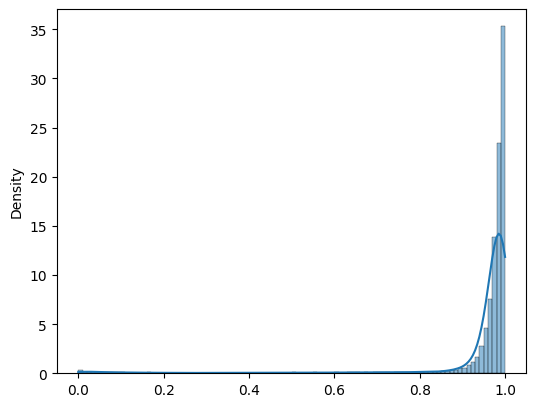

In [53]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 12), tight_layout=True)
rows = 3
columns = 4

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(transfer_theta[4], kde=True, stat='density', bins=100)

<Axes: ylabel='Density'>

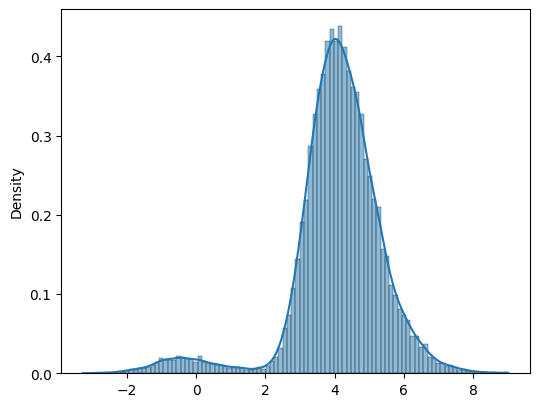

In [42]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 12), tight_layout=True)
rows = 3
columns = 4

# Weghtening
fig.add_subplot(rows, columns, 1)
sns.histplot(hier_theta_mu[0], kde=True, stat='density', bins=100)

In [118]:
from scipy.stats import norm

def inv_logit(x):
    out = np.exp(x)/(1+np.exp(x))
    return out 

In [125]:
normal = np.random.normal(0,2, size=10000)

In [126]:
transfer_normal = inv_logit(normal)


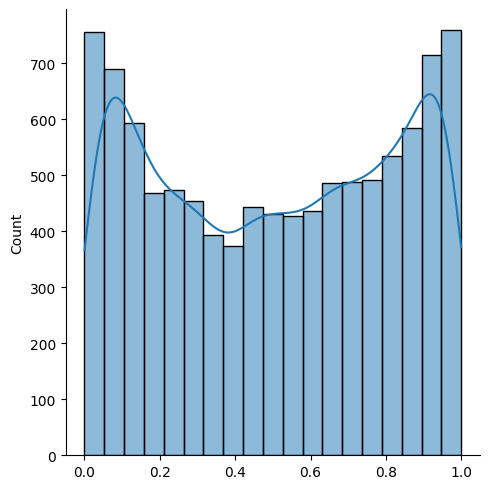

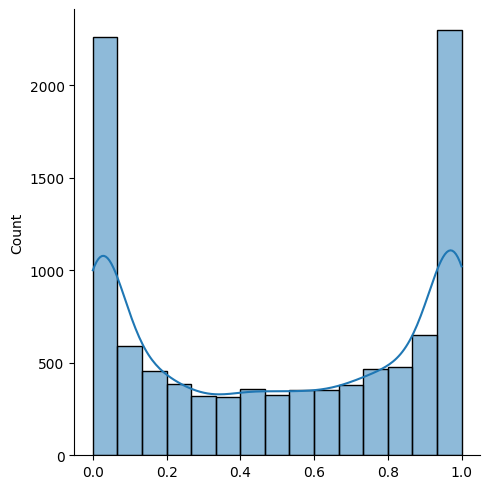

In [127]:
sns.displot(transfer_normal, kde=True)
sns.displot(norm.cdf(normal), kde=True)


